In [7]:
# Import Library
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.models import *
import os
import random
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

In [8]:
# Read dataset
path = "C:\IngIng\lab\chest_xray"
os.listdir(path)

['test', 'train', 'val']

In [9]:
train_path = []
test_path = []
val_path = []
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/train"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            train_path.append(os.path.join(dir_name, filename))
            
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/test"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            test_path.append(os.path.join(dir_name, filename))
            
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/val"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            val_path.append(os.path.join(dir_name, filename))

In [10]:
train_path

['C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1003233-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1012843-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1014768-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1023731-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1029510-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1031320-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1034239-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1041364-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1044645-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1055663-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1063934-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1064313-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1064313-0002.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1068231-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\

In [11]:
train_image = []
train_label = []
test_image = []
test_label = []
val_image = []
val_label = []
width = 224
height = 224
from tqdm import tqdm
title_dict = {'PNEUMONIA':1, 'NORMAL':0}
for img_path in tqdm(train_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    train_image.append(image)
    train_label.append(title_dict[label])
              
for img_path in tqdm(test_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    test_image.append(image)
    test_label.append(title_dict[label])
              
for img_path in tqdm(val_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    val_image.append(image)
    val_label.append(title_dict[label])

100%|██████████| 16/16 [00:00<00:00, 110.28it/s]


In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
train_labels = le.fit_transform(train_label)
train_labels = to_categorical(train_labels)
test_labels = le.fit_transform(test_label)
test_labels = to_categorical(test_labels)
val_labels = le.fit_transform(val_label)
val_labels = to_categorical(val_labels)

In [13]:
print(le.classes_)
print(val_labels[0])

[0 1]
[1. 0.]


In [14]:
train_image = np.array(train_image)
train_labels = np.array(train_labels)

test_image = np.array(test_image)
test_labels = np.array(test_labels)

val_image = np.array(val_image)
val_labels = np.array(val_labels)
train_image.shape, train_labels.shape

((5232, 224, 224, 3), (5232, 2))

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [16]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='pneumonia_classification_ii.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)
callbacks_list = [learning_rate_reduction, model_checkpoint]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import pandas as pd

In [18]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16

In [29]:
vgg_base_model = VGG16(input_shape=(224,224,3),weights='imagenet', include_top=False)
vgg_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
def freezing_layers(model_name):
    for layer in model_name.layers:
        layer.trainable = False  

In [30]:
#freezing layers
freezing_layers(vgg_base_model) 

In [31]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [32]:
vgg_model = Sequential()
vgg_model.add(vgg_base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.5))
vgg_model.add(layers.Dense(2, activation ='sigmoid'))
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 4098      
Total params: 66,109,250
Trainable params: 51,390,466
Non-trainable params: 14,718,784
_________________________________

In [33]:
vgg_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
# Training model
vgg_model.fit(x = train_image, y=train_labels, 
              epochs=50, batch_size=32 , 
              validation_data=(test_image, test_labels), 
              callbacks=callbacks_list
             )

Epoch 1/50
164/164 [==============================] - 20s 48ms/step - loss: 0.1844 - accuracy: 0.9513 - val_loss: 0.1500 - val_accuracy: 0.9519
Epoch 2/50
164/164 [==============================] - 6s 38ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.2065 - val_accuracy: 0.9295
Epoch 3/50
164/164 [==============================] - 6s 39ms/step - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.3443 - val_accuracy: 0.9006
Epoch 4/50
164/164 [==============================] - 6s 39ms/step - loss: 0.0194 - accuracy: 0.9925 - val_loss: 0.6181 - val_accuracy: 0.8734
Epoch 5/50
164/164 [==============================] - 6s 39ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.3710 - val_accuracy: 0.9119
Epoch 6/50
164/164 [==============================] - 6s 40ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.3448 - val_accuracy: 0.9231
Epoch 7/50
164/164 [==============================] - 7s 40ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.6959 - val_accuracy: 0.870

In [35]:
vgg_model.load_weights('pneumonia_classification_ii.hdf5')
vgg_model.evaluate(x=test_image, y=test_labels, batch_size=8)
vgg_model.evaluate(x=val_image, y=val_labels, batch_size=8)

2/2 [==============================] - 0s 14ms/step - loss: 0.0939 - accuracy: 0.9375


[0.09392545372247696, 0.9375]

In [36]:
vgg_prediction = vgg_model.predict(test_image, batch_size=8)

<AxesSubplot:>

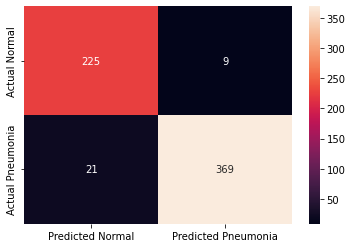

In [37]:
y_pred = np.argmax(vgg_prediction, axis=1)
y_test = np.argmax(test_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       234
           1       0.98      0.95      0.96       390

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



In [39]:
vgg_prediction_val = vgg_model.predict(val_image, batch_size=8)

<AxesSubplot:>

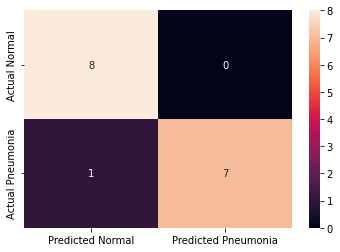

In [40]:
y_pred = np.argmax(vgg_prediction_val, axis=1)
y_test = np.argmax(val_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [43]:
resnet_base_model = ResNet50(input_shape=(224,224,3),weights='imagenet', include_top=False)

In [44]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [45]:
def freezing_layers(model_name):
    for layer in model_name.layers:
        layer.trainable = False  

In [46]:
#freezing layers
freezing_layers(resnet_base_model) 

In [58]:
res_model = Sequential()
res_model.add(resnet_base_model)
res_model.add(layers.Flatten())
res_model.add(layers.Dense(2048, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(layers.Dense(2, activation ='sigmoid'))
res_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 4098      
Total params: 229,122,946
Trainable params: 205,531,138
Non-trainable params: 23,591,808
_______________________________

In [59]:
res_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='pneumonia_classification_iii.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)
callbacks_list = [learning_rate_reduction, model_checkpoint]

In [64]:
# Training model
res_model.fit(x = train_image, y=train_labels, 
              epochs=50, batch_size=32 , 
              validation_data=(test_image, test_labels), 
              callbacks=callbacks_list
             )

Epoch 1/50
164/164 [==============================] - 8s 44ms/step - loss: 4.9161e-04 - accuracy: 1.0000 - val_loss: 0.7565 - val_accuracy: 0.8590
Epoch 2/50
164/164 [==============================] - 7s 44ms/step - loss: 4.5231e-04 - accuracy: 1.0000 - val_loss: 0.7792 - val_accuracy: 0.8558
Epoch 3/50
164/164 [==============================] - 7s 44ms/step - loss: 3.9204e-04 - accuracy: 1.0000 - val_loss: 0.7779 - val_accuracy: 0.8558
Epoch 4/50
164/164 [==============================] - 7s 44ms/step - loss: 7.8882e-04 - accuracy: 0.9998 - val_loss: 0.7881 - val_accuracy: 0.8558
Epoch 5/50
164/164 [==============================] - 7s 44ms/step - loss: 3.8289e-04 - accuracy: 1.0000 - val_loss: 0.7911 - val_accuracy: 0.8542
Epoch 6/50
164/164 [==============================] - 7s 44ms/step - loss: 5.8275e-04 - accuracy: 1.0000 - val_loss: 0.7740 - val_accuracy: 0.8574
Epoch 7/50
164/164 [==============================] - 7s 44ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.756

In [66]:
res_model.load_weights('pneumonia_classification_iii.hdf5')
res_model.evaluate(x=test_image, y=test_labels, batch_size=8)
res_model.evaluate(x=val_image, y=val_labels, batch_size=8)

2/2 [==============================] - 0s 10ms/step - loss: 6.2194e-06 - accuracy: 1.0000


[6.219388978934148e-06, 1.0]

In [67]:
resnet_prediction = res_model.predict(test_image, batch_size=8)

<AxesSubplot:>

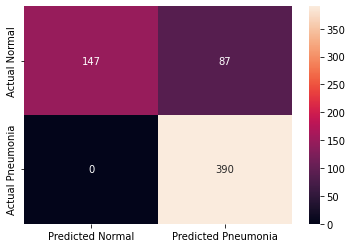

In [68]:
y_pred = np.argmax(resnet_prediction, axis=1)
y_test = np.argmax(test_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       234
           1       0.82      1.00      0.90       390

    accuracy                           0.86       624
   macro avg       0.91      0.81      0.84       624
weighted avg       0.89      0.86      0.85       624



In [70]:
resnet_prediction_val = res_model.predict(val_image, batch_size=8)

<AxesSubplot:>

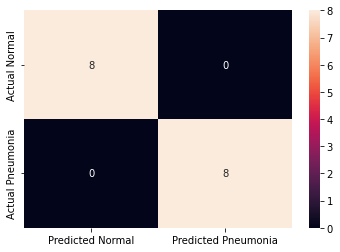

In [71]:
y_pred = np.argmax(resnet_prediction_val, axis=1)
y_test = np.argmax(val_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

